3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]


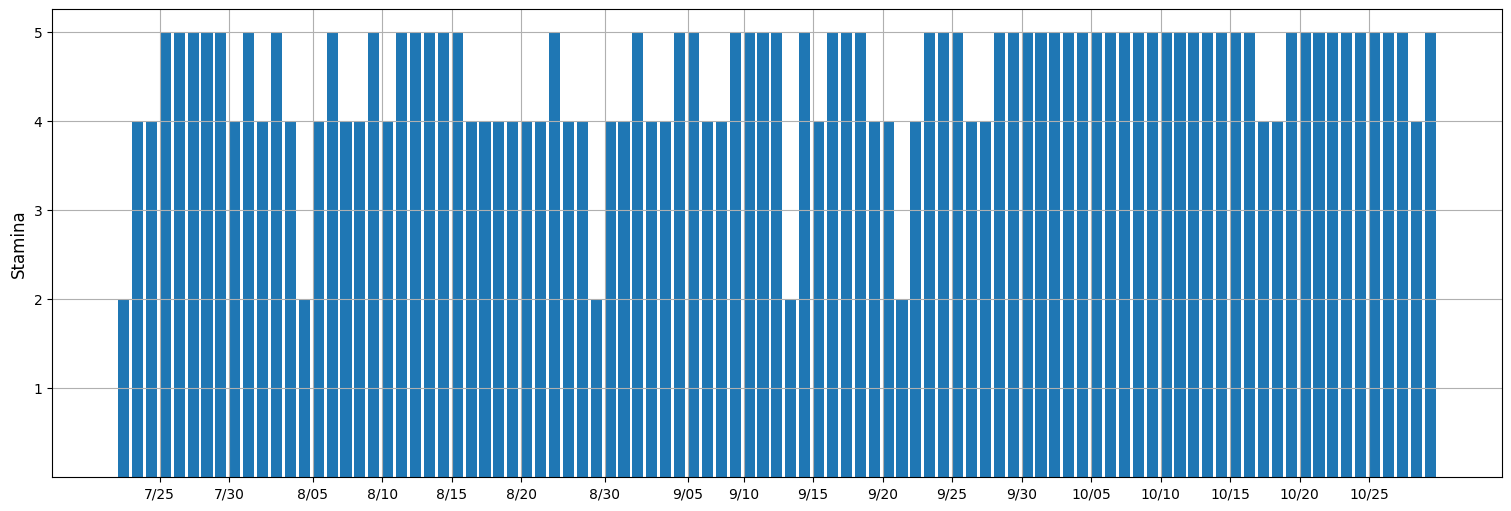

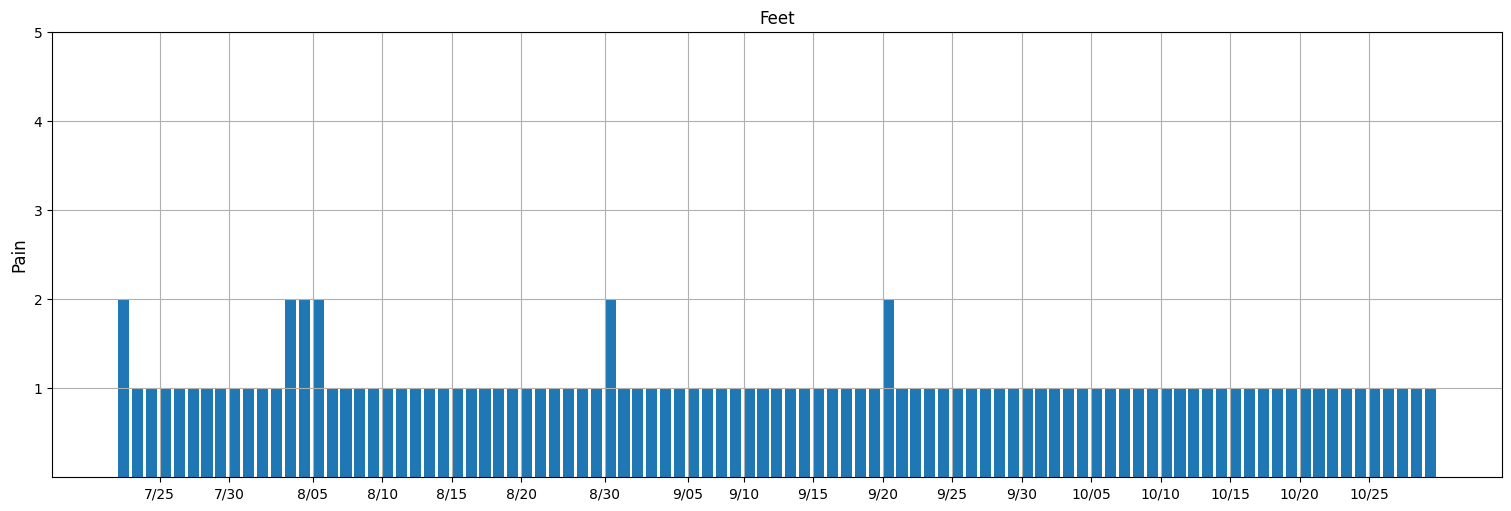

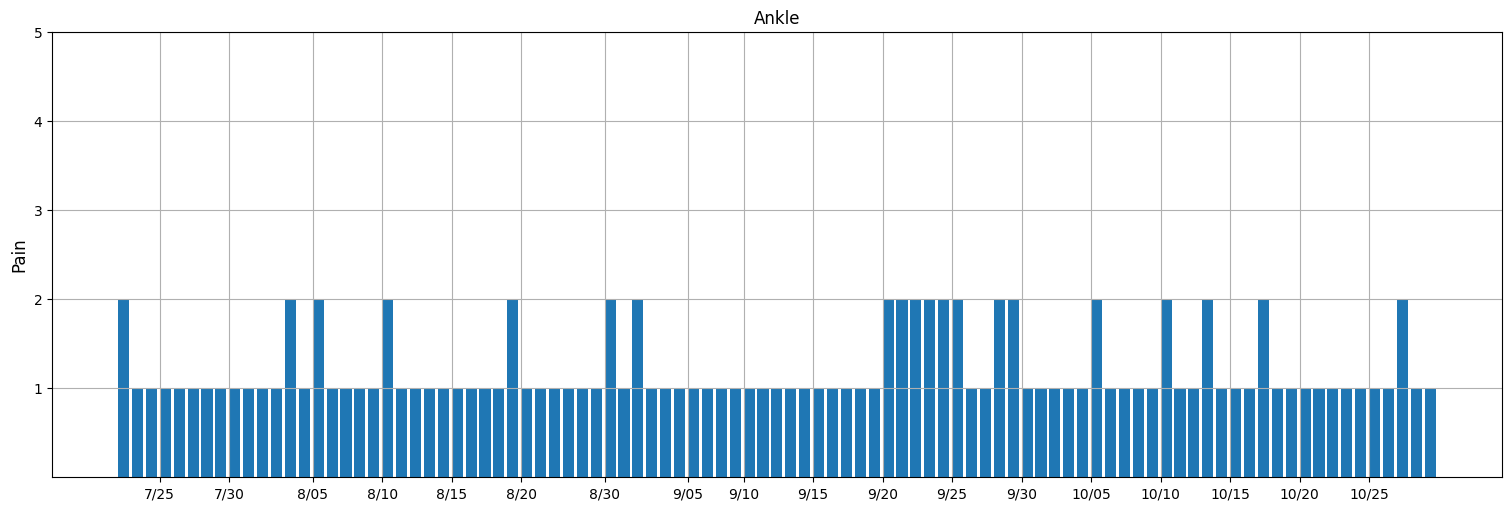

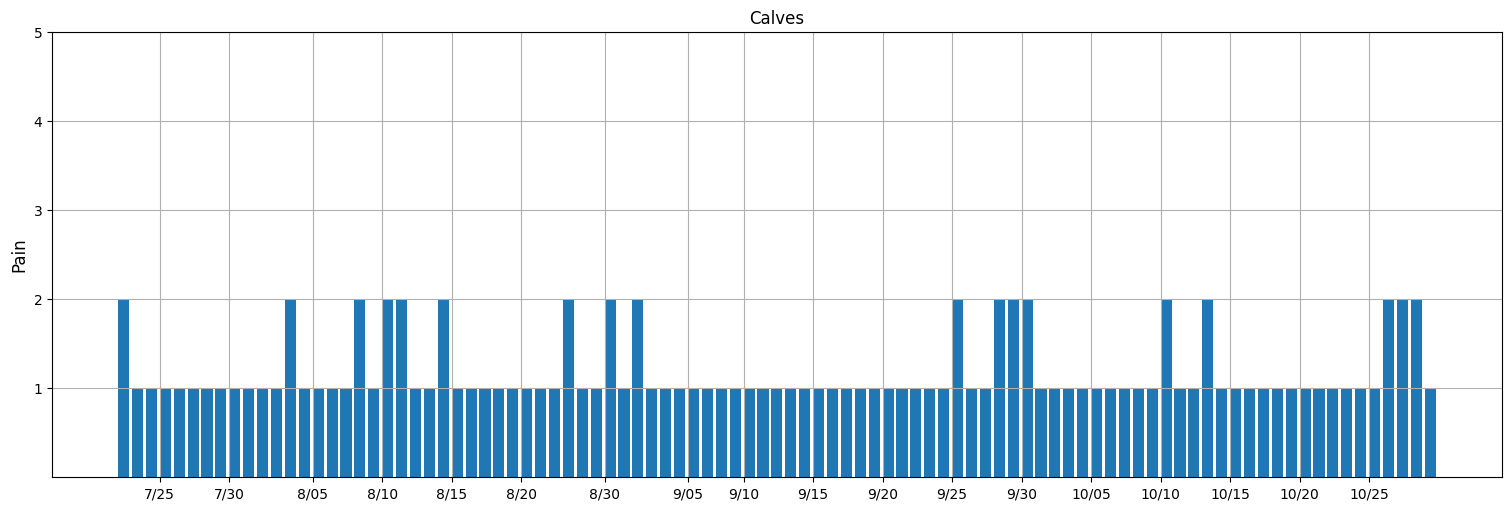

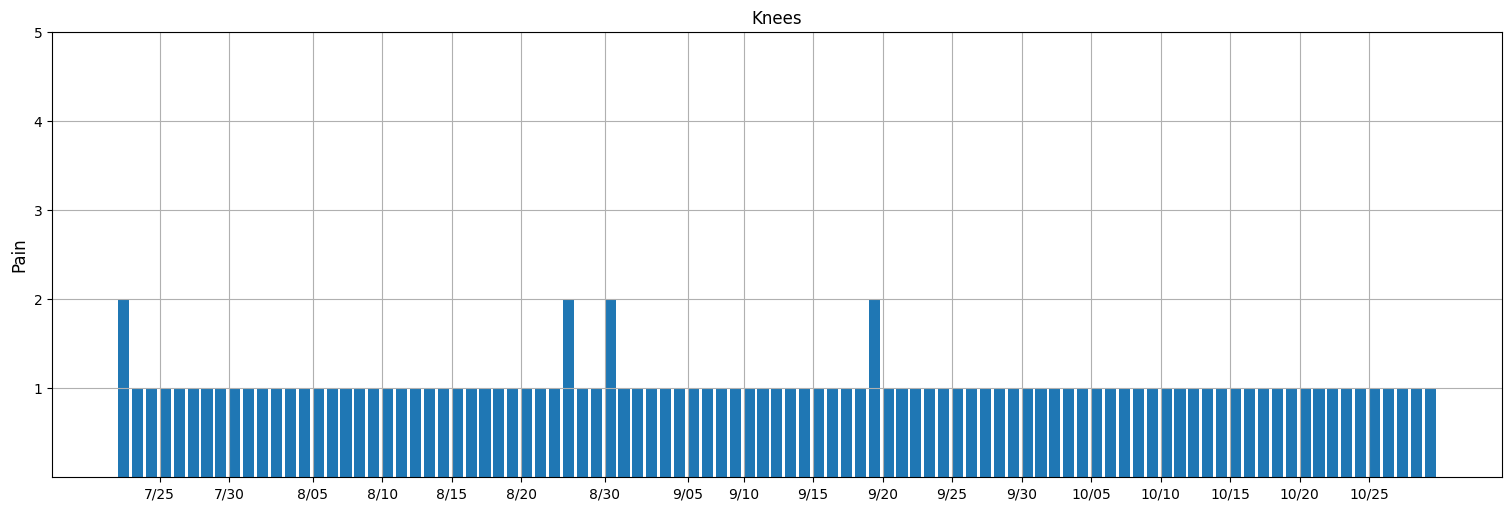

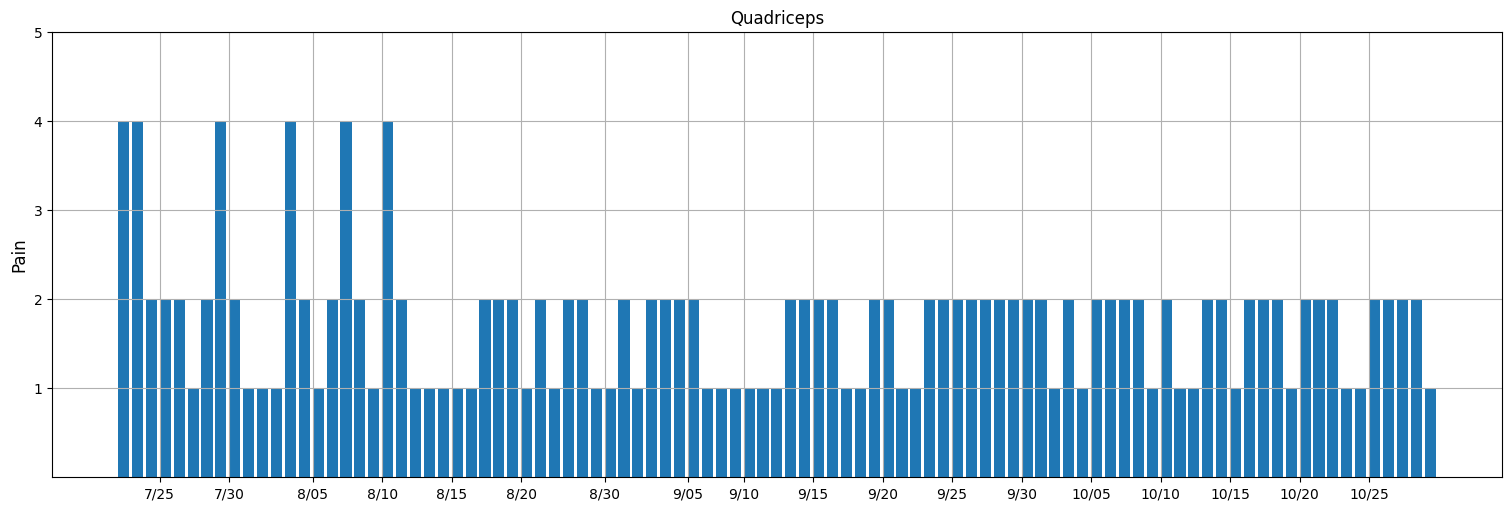

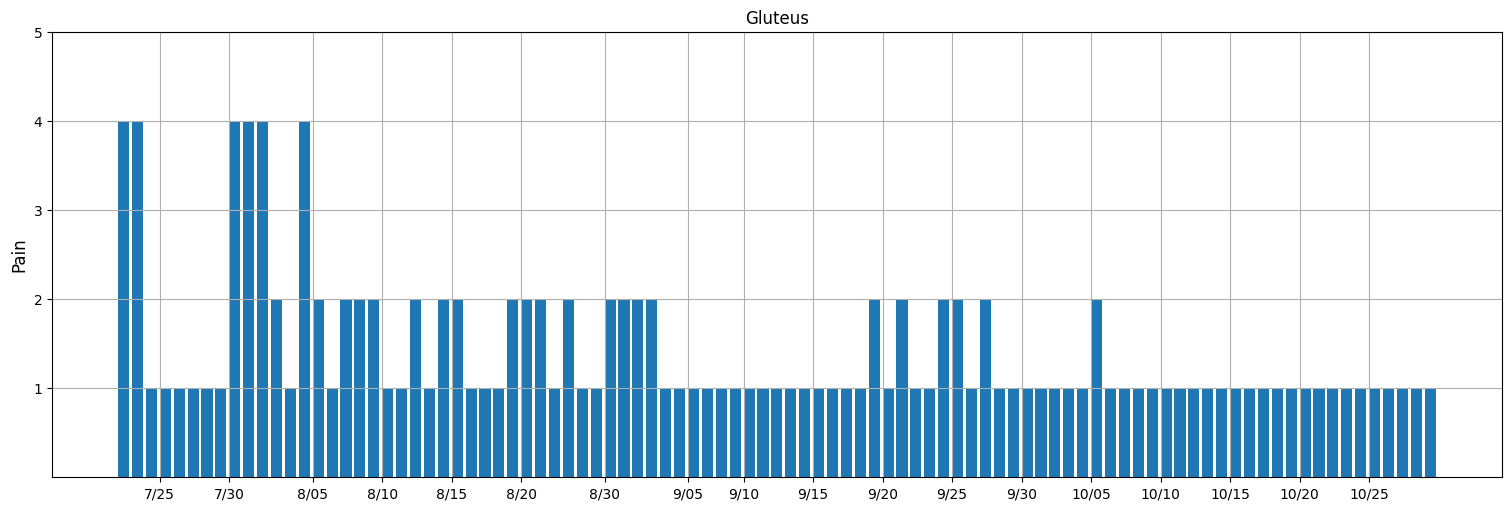

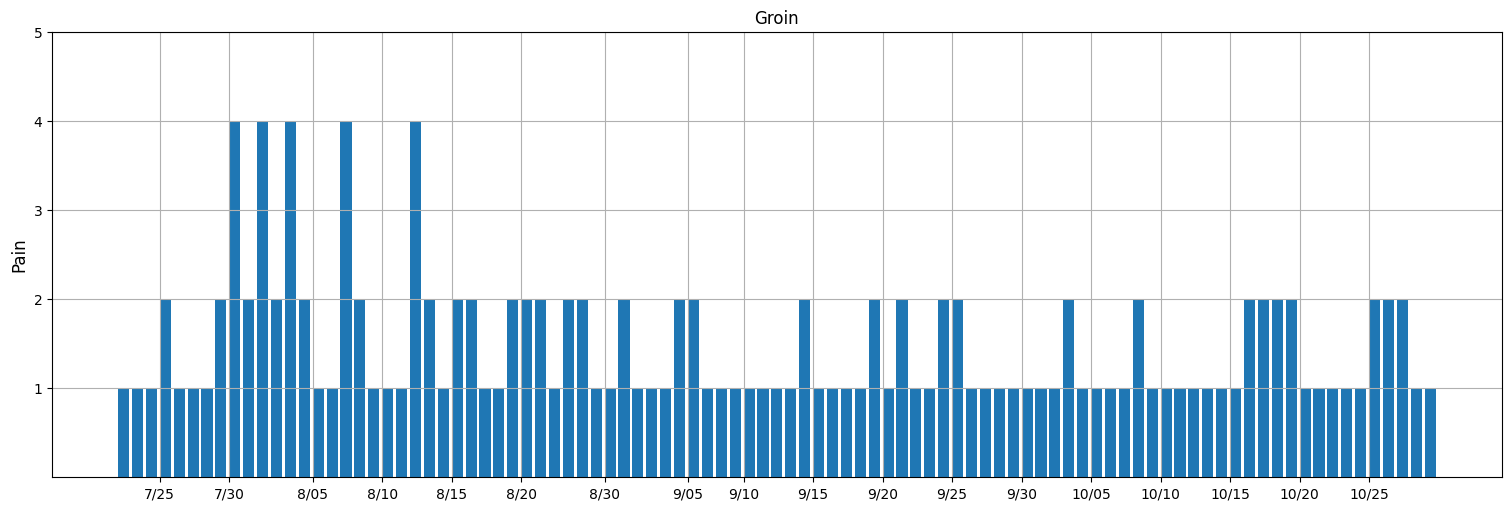

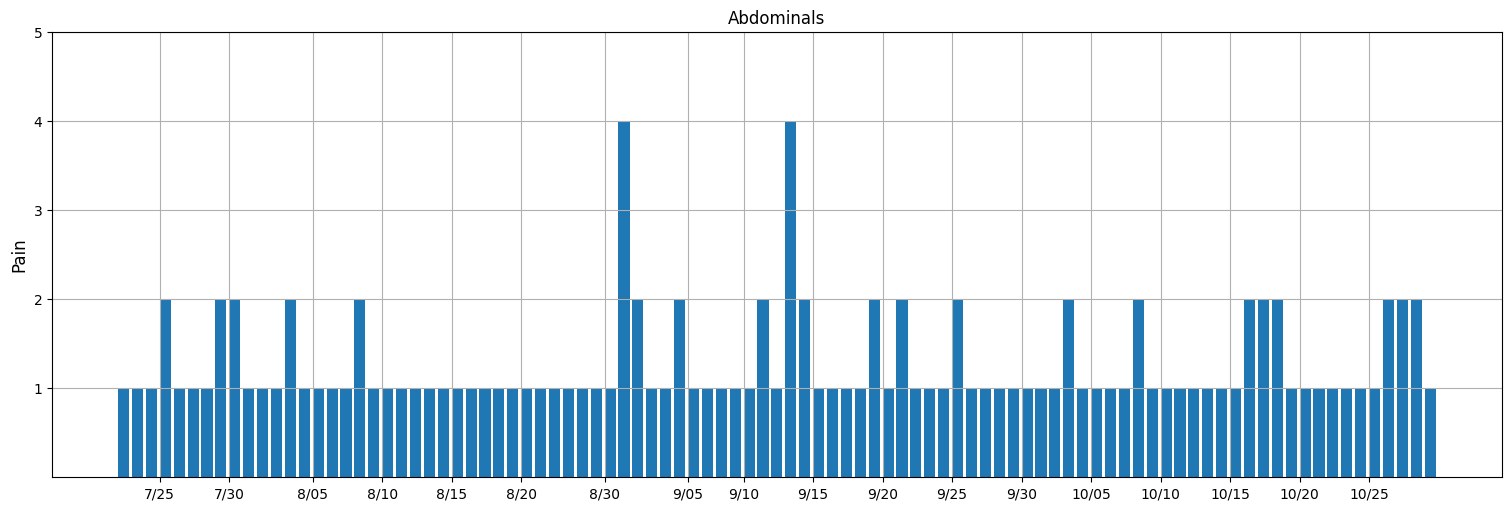

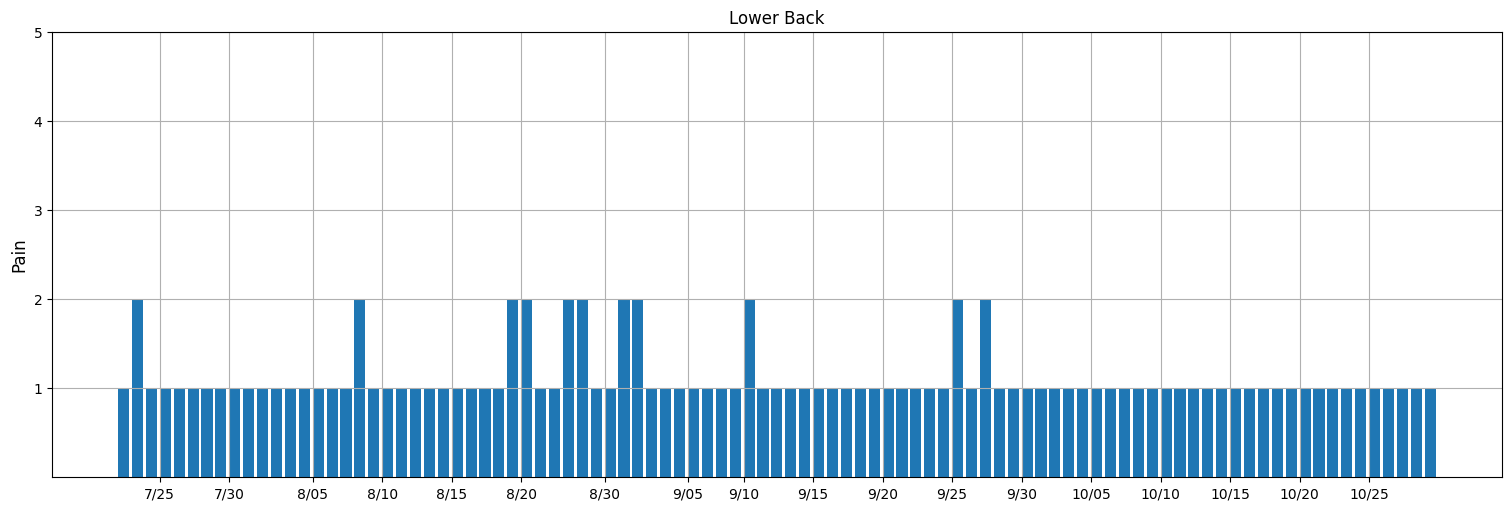

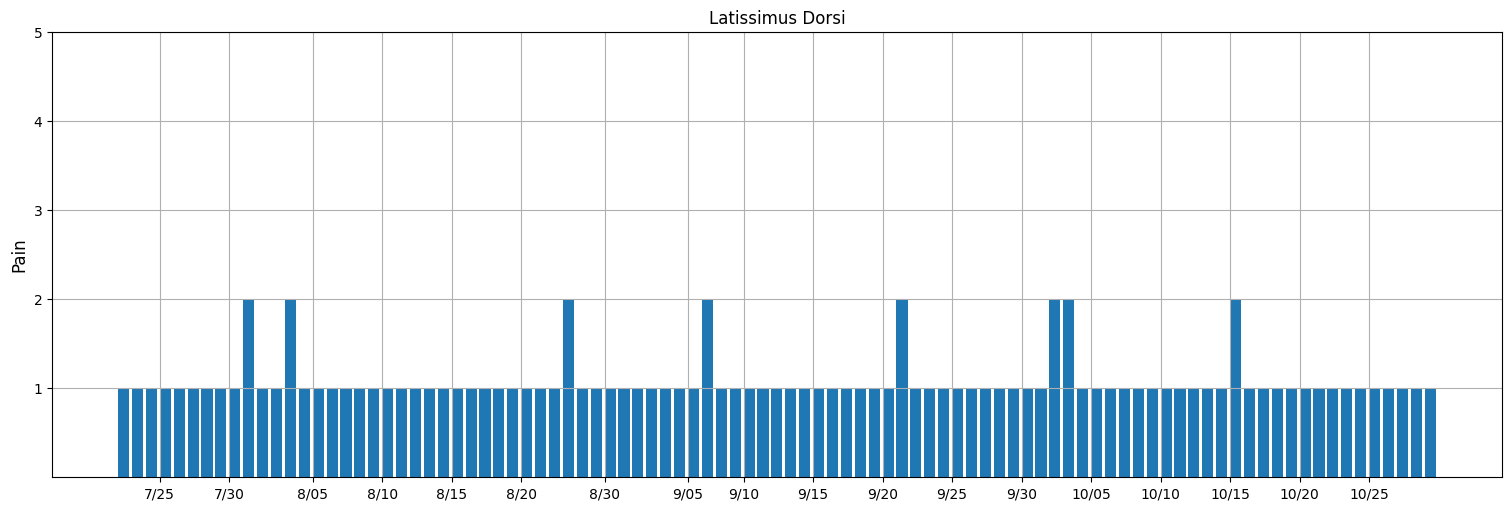

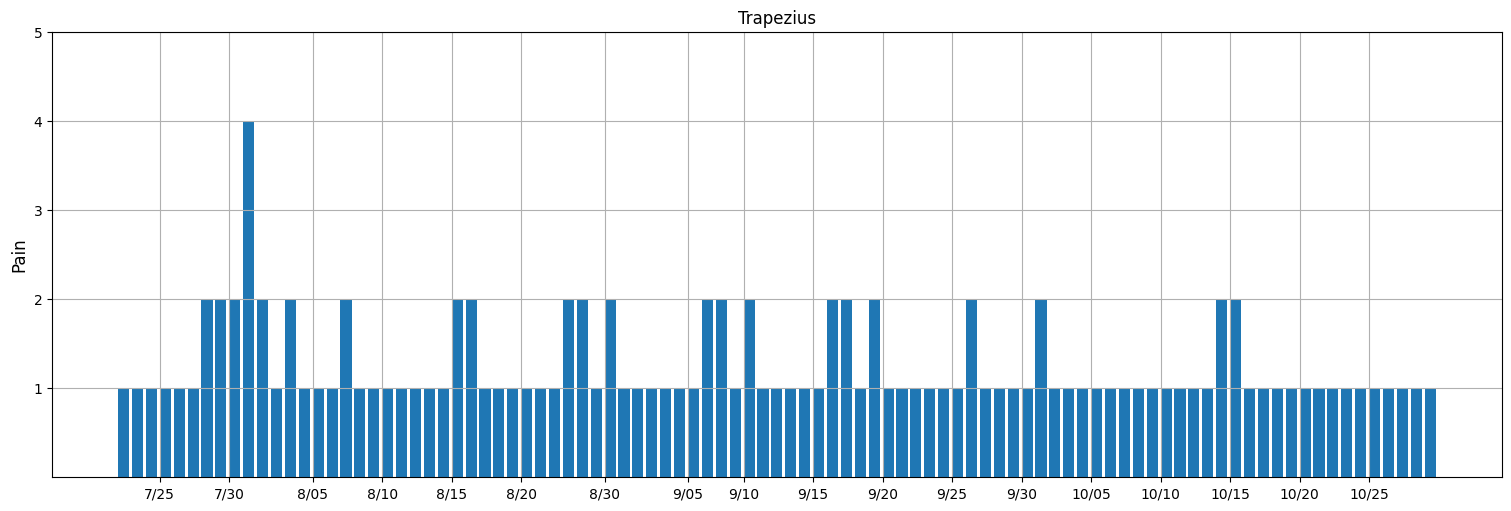

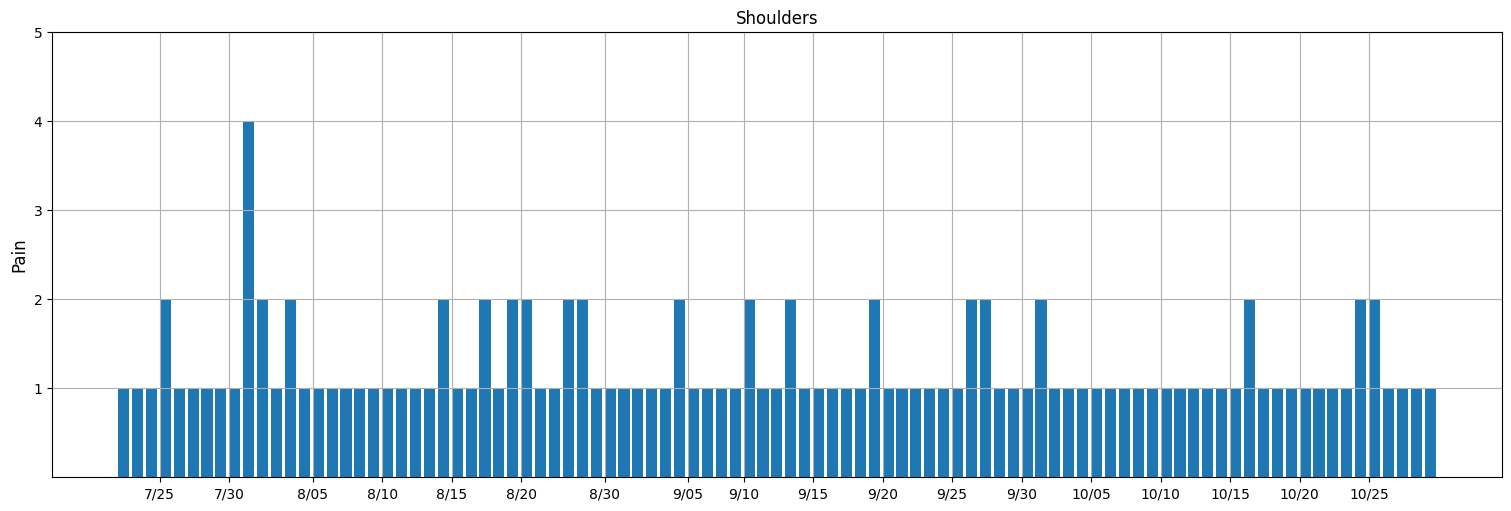

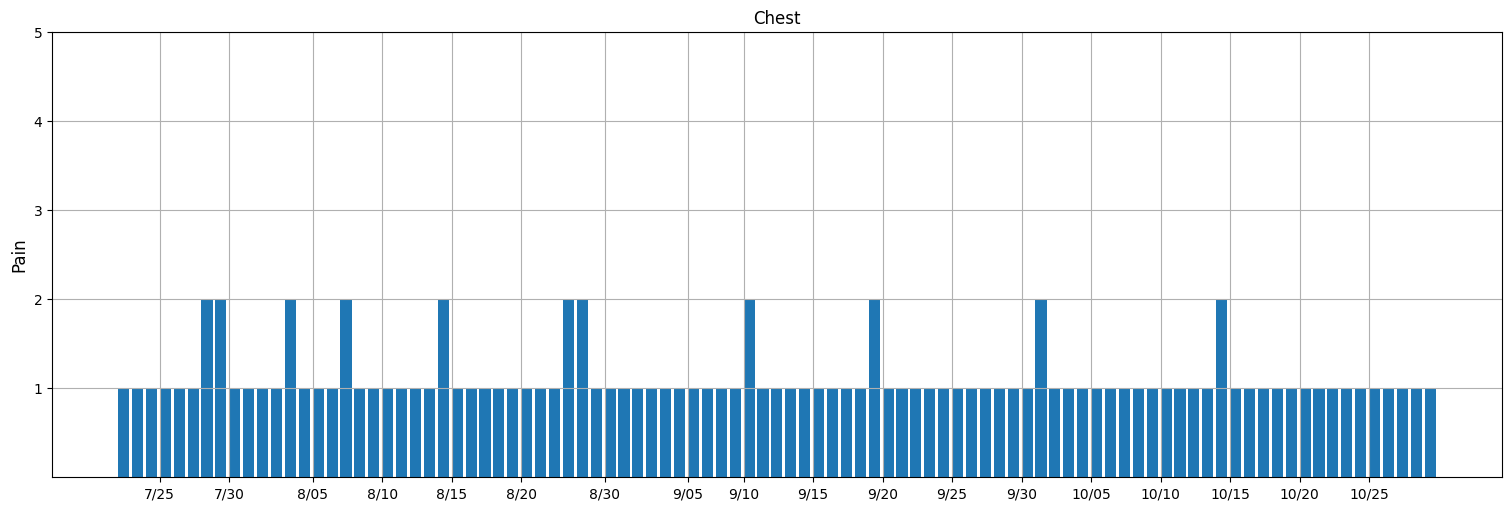

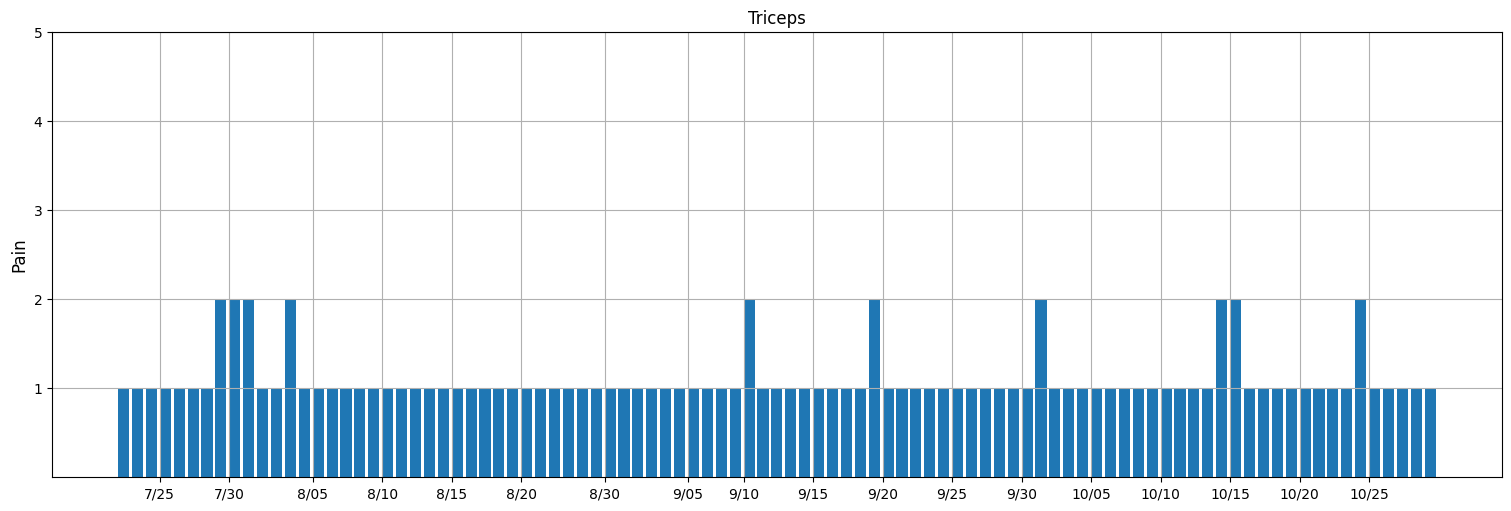

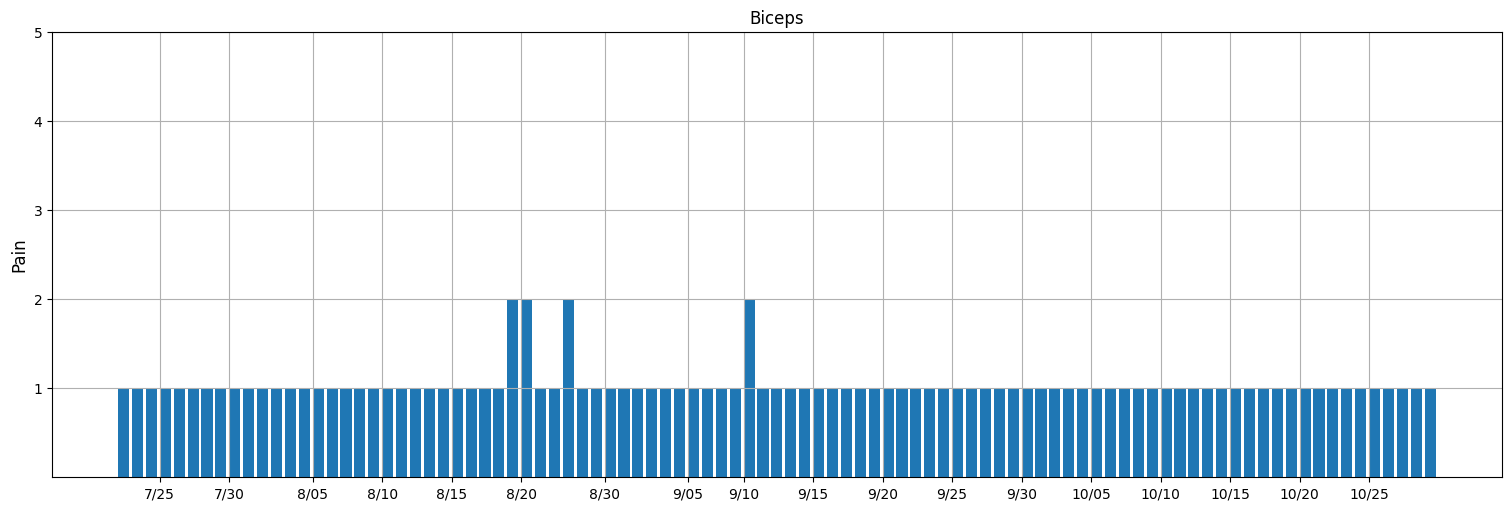

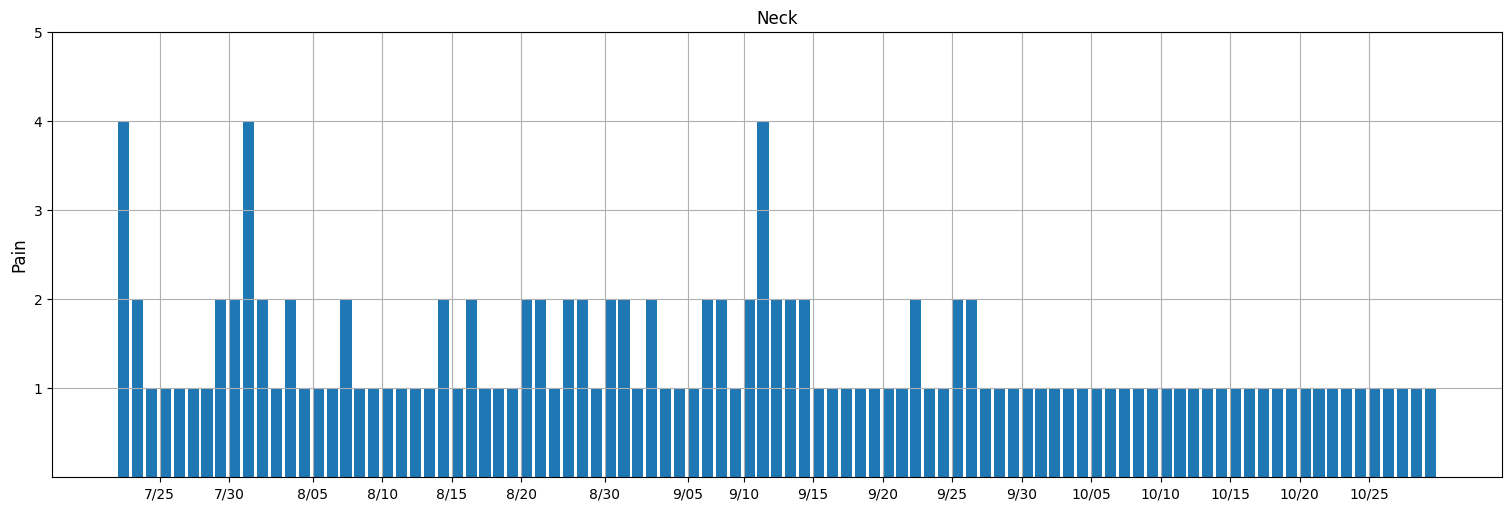

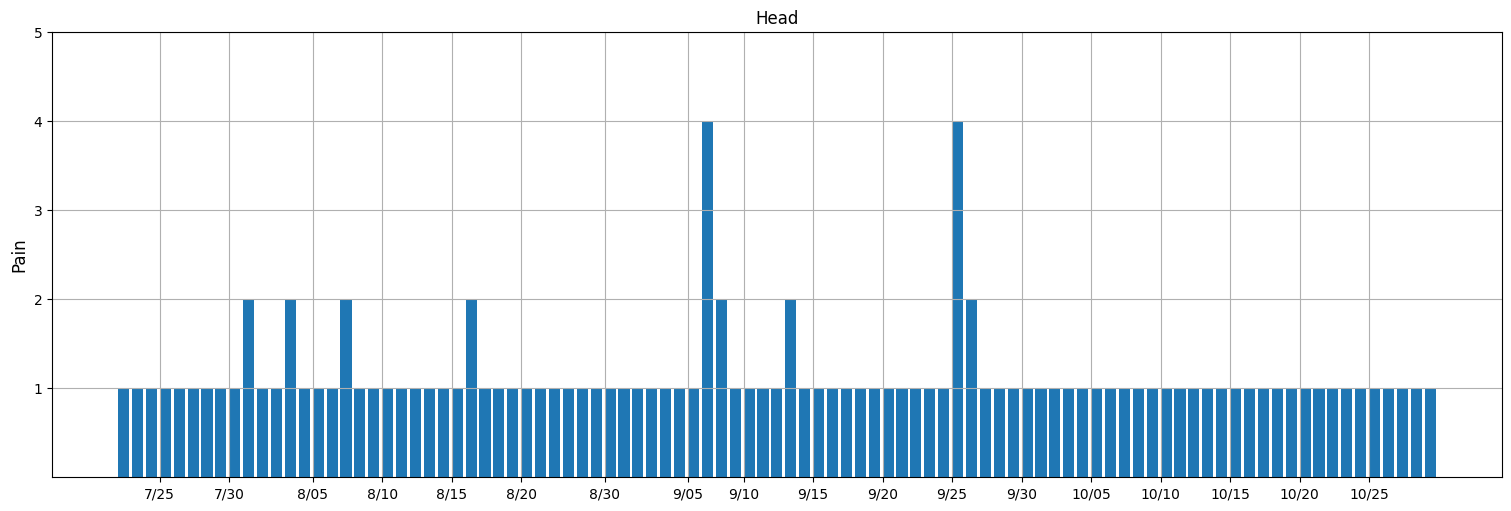

In [47]:
def todo(self):
  # List of primary issues
  # todo    description                                   hours   progress      Note
  # todo0   A0/1.csv skate, long, downhill, juggling,
  #         running duration per day, overall mean.
  # todo1   A0/1.csv longboard distance, running
  #         distance per day, overall mean
  # todo2   P0.csv observations, mean in each,            20      Halted        Halted at ARIMA
  #         category ARIMA (after todo3).
  # todo3   p1 observations, manual prediction, mean in   9       Processing    Left at ascii graph
  #         each category, ARIMA.
  # todo4   B01.csv calories, salt, fat, protein, carb,   2       Halted        Halted at ARIMA
  #         alc each day, overall mean, ARIMA (todo3).
  #
  #
  # todo5   B01 weather summary, OS PRISM, exercise
  #         intensity.
  # todo6   B01 (moving window) correlation between
  #         exercise and ___.
  #         (calorie, real weather, alcohol)
  # todo7   B01 moving window spearman correlation
  #         between todo0 duration and pain, calories
  #         burned. duration and nutrients. real and
  #         summary weather. pain and real weather.
  #         pain and summary weather. ???.
  # todo8   tbd data filling idk if thats another
  #         chapter or avoided.
  #
  # Time spent at a computer programming
  # Total estimate  :
  # Total actual    :
  #
  # Summary
  # asdfasdf
  #
  # Start date: 20250125
  # End date:

  # There is an exhaustive list of excessive secondary issues.

  # List of secondary issues
  # todo   description                              progress
  # todo0  rewrite parser for unicode csv str/int
  # todo1  Stats class avoid NA, NAAN, -9999
  # todo2  refractor RGB_graphs
  # todo3  monthly means on bar graphs
  return

import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
print(sys.version)
# 3.10.12 (main, Mar 22 2024, 16:50:05) [GCC 11.4.0]

##############################################################################
# Part A: CSV parser class to open the file and parse the values into a list #
##############################################################################
class CSV_Parser:
  # Initialize the input variables
  def __init__(self, data_path):
    self.data_path = data_path
  def file_opener(self):
    with open(self.data_path, "r") as data_open:
      data_read = data_open.read()
      return data_read
  # Index the commas and line breaks
  def comma_index(self, open_file, column_len):
    data_comma_place = [0]
    column_pl_len = 0
    for i in range(len(open_file)):
      data1_col1 = open_file[i]
      if data1_col1 == ",":
        data_comma_place.append(i)
        data_comma_place.append(i+1)
      if data1_col1 == "\n":
        data_comma_place.append(i)
        data_comma_place.append(i+1)
        # If you want to use the function to get the column width, set to 1
        if column_len == 1:
          col_width = len(data_comma_place)
          return col_width
          break
    last_val = data_comma_place[-1] + 2
    data_comma_place.append(last_val)
    return data_comma_place
  # Splitting the csv characters into list of words based on indexed comma position
  def csv_value_list(self, data_comma_out, open_file, col_width, col_head):
    j = col_head
    data_val_list = []
    for i in range(len(data_comma_out)):
      if j >= len(data_comma_out):
        break
      comma_strt = data_comma_out[j]
      j += 1
      comma_end = data_comma_out[j]
      #print(comma_strt, "and ", comma_end)
      j += 1
      data_val_list.append(open_file[comma_strt:comma_end])
      j = j + (col_width * 2)
    return data_val_list
  # Flipping the columns from high to low for readability
  # If the original value was 5, set it to equal 0 (no pain)
  # If the original value was 0, set it to equal to 5 (high pain) etc.
  # If none of those things are true, append the string (for the column header)
  def csv_flipper(self, csv_list, col_width):
    csv_flipped = []
    for i in csv_list:
      if i == str(5):
        n = str(1)
        csv_flipped.append(n)
      elif i == str(4):
        n = str(2)
        csv_flipped.append(n)
      elif i == str(3):
        n = str(3)
        csv_flipped.append(n)
      elif i == str(2):
        n = str(4)
        csv_flipped.append(n)
      elif i == str(1):
        n = str(5)
        csv_flipped.append(n)
      else:
        csv_flipped.append(i)
    return csv_flipped

######################################################
# Part B: Get descriptive statistics of each column. #
######################################################
class Statistics:
  # Returns a dictionary with the header and mean
  def mu(self, col_list):
    total = 0
    counter = 0
    # Column has to have a header
    for i in col_list[1:]:
      if i == "NA":
        continue
      total = total + float(i)
      counter += 1
    mean = total / counter
    header_mean = [col_list[0], mean]
    return header_mean
  # Returns the 2-4 moment of the distribution
  # Different than Google Sheets sample vs population
  def mnt(self, header, mean, col_list):
    col_1 = len(col_list) - 1
    stn = 0
    skew = 0
    kurt = 0
    counter = 0
    for i in col_list[1:]:
      if i == "NA":
        continue
      # secondary todo: doesn't work with decimals
      n1 = int(i) - mean
      n1_sqr = n1 ** 2
      n1_cube = n1 ** 3
      n1_quad = n1 ** 4
      stn = stn + n1_sqr
      skew = skew + n1_cube
      kurt = kurt + n1_quad
      counter += 1
    # Sample variance (n-1)
    # Population variance (n)
    counter = (counter - 1)
    stn_small_sqr = float(stn) / counter
    stn_small = stn_small_sqr ** .5
    skew_small_sqr = float(skew) / counter
    skew_small = skew_small_sqr / (stn_small ** 3)
    kurt_small_sqr = float(kurt) / counter
    kurt_small = kurt_small_sqr / (stn_small ** 4)
    return [header, stn_small, skew_small, kurt_small]
  # Covariance and correlation
  def covar(self, x_mean, y_mean, col_1_list, col_2_list):
    col_len = len(col_1_list) - 1
    covar = 0
    x1y1_sum = 0
    counter = 0
    for i in range(col_len):
      #if i == col_len-2:
      #  break
      if col_1_list[i+1] == "NA":
        continue
      if col_2_list[i+1] == "NA":
        continue
      # print(i+3,i)
      # print("x_mean: ", x_mean[1], "x_value: ", col_1_list[i+1])
      x1 = float(col_1_list[i+1]) - x_mean[1]
      y1 = float(col_2_list[i+1]) - y_mean[1]
      x1y1 = x1 * y1
      x1y1_sum = x1y1_sum + x1y1
      counter += 1
    covar = x1y1_sum / counter
    return covar
  def cor(self, covar, col_1_stnd, col_2_stnd):
    stnd12 = col_1_stnd * col_2_stnd
    cor = covar / stnd12
    return cor

######################################################
# Part C: Data visualization with a timeseries graph #
######################################################
# 'Graph' class accepts three variables: verticle arranged 'data',
# the date column'date_col_num', and the data column 'data_col_num'
class Graph:
  # Initialize the input variables
  def __init__(self, data, date_col_num, data_col_num):
    self.data = data
    self.date_col_num = date_col_num
    self.data_col_num = data_col_num
  def hi_lo(self, data_col_num):
    # The date and date column to be used
    data_col = self.data[data_col_num]
    data_col_len = len(data_col)
    # High and low of values
    hi_lo_count = 1
    hi = data_col[1]
    lo = data_col[1]
    for e in range(len(data_col[1:])):
      hi_lo_count += 1
      if hi_lo_count == (len(data_col[1:]) + 1):
        break
      if hi < data_col[hi_lo_count]:
        hi = data_col[hi_lo_count]
      if lo > data_col[hi_lo_count]:
        lo = data_col[hi_lo_count]
    return [hi, lo]
  def binned(self, hi_lo):
    # high value (5 in this case or hi_lo[0])
    # The date and date column to be used
    # TODO it works but is not resuable for other data ranges
    date_col = self.data[self.date_col_num]
    data_col = self.data[self.data_col_num]
    data_col_len = len(data_col)

    fiver = []
    fourer = []
    threer = []
    twoer = []
    oner = []
    lol_stm_date = []
    counter = 1
    # Binned with date value
    for i in range(data_col_len):
      P0_column = self.data[self.data_col_num]
      if counter == len(self.data[0]):
        break
      # secondary todo:
      if P0_column[counter] == "NA":
        counter += 1
        continue
      if float(P0_column[counter]) == 5:
        fiver.append([date_col[counter], P0_column[counter]])
      elif float(P0_column[counter]) == 4:
        fourer.append([date_col[counter], P0_column[counter]])
      elif float(P0_column[counter]) == 3:
        threer.append([date_col[counter], P0_column[counter]])
      elif float(P0_column[counter]) == 2:
        twoer.append([date_col[counter], P0_column[counter]])
      elif float(P0_column[counter]) == 1:
        oner.append([date_col[counter], P0_column[counter]])
      counter += 1
    # Combining the binned data into one dictionary
    lol_date_stm = [fiver, fourer, threer, twoer, oner]
    return lol_date_stm

  def time_series(self, date_hi_lo, lol_date_stm):
    date_col = self.data[self.date_col_num]
    # Base of the month, plus 00 i.e. 500
    date_base = int(date_hi_lo[1]) - 1
    # The number of spaces is the 'day' (date - month) - 'prev_day_space_int'
    # The difference between the values is multiplied by ' ' for each 5,4,3,2,1
    # Value with a '+' character marking the position
    spacer = []
    prev_day_space_int = 0
    for i in lol_date_stm:
      spacer_mid = []
      for ii in i:
        # ii is [date, value] in order
        # an if else statement
        # 7 starts at 22, 31 days
        # 8 30 days
        # 9 30 days
        # 10 31 days
        day = int(ii[0]) - date_base
        # print(day)
        day_count = day - prev_day_space_int
        day_space_str = ((day_count-1)*2) * " "
        spacer_mid.append(day_space_str)
        prev_day_space_int = day
      prev_day_space_int = 0
      spacer.append(spacer_mid)
    y_val = [y for y in range(len(spacer),0,-1)]
    return [spacer, y_val]
  def time_series_print(self,spacer,y_val):
    date_col = self.data[self.date_col_num]
    for j,k in zip(spacer,y_val):
      # y values
      print(k,end=" ")
      for l in j:
        print(l,end="")
        print("+",end=" ")
      print()
    # x values
    for m in range(len(date_col[0])-1):
      print("  ",end="")
      for n in date_col[1:]:
        print(n[m], end=" ")
      print()
    return
  def time_series_write(self,header,txt_out,spacer,y_val):
    # Open the output file location and write data to the txt
    date_col = self.data[self.date_col_num]
    file_output = open(txt_out, "w")
    file_output.write(header)
    file_output.write("\n")
    file_output.write("\n")
    # y values
    for j,k in zip(spacer,y_val):
      file_output.write(str(k) + " ")
      for l in j:
        file_output.write(str(l))
        file_output.write("+" + " ")
      file_output.write("\n")
    # x values
    for m in range(len(date_col[0])-1):
      file_output.write("  ")
      for n in date_col[1:]:
        file_output.write(str(n[m]) + " ")
      file_output.write("\n")
    file_output.close()
    return

###############################################
# Part D: Data visualization with a RGB graph #
###############################################
# Matplotlib for color because otherwise you would have
# to write hardware code to avoid using Python or C libraries.
class Graphs_rgb:
  # Initialize the input variables
  def __init__(self, data, date_col_num, data_col_num):
    self.data = data
    self.date_col_num = date_col_num
    self.data_col_num = data_col_num
  # Bar plots for each column
  # P1.csv
  def rgb_timeseries_bar(self,title_full):
    #date_col = self.data[self.date_col_num]
    # date_col = self.data[0]
    date_col = self.data[1]
    data_col = self.data[self.data_col_num]
    # Functionalize
    # Builds an array to skip NA and format the date
    day_count = len(date_col)
    dist0 = []
    dist1 = []
    dist2 = []
    for id in range(day_count):
      if id == (day_count-1):
        break
      if data_col[id+1] == "NA":
        continue
      else:
        # Formatting the date
        # year = 2024
        date_length = date_col[id+1]
        if len(date_length) < 4:
          month = date_length[:1]
          day = date_length[1:]
        else:
          month = date_length[:2]
          day = date_length[2:]
        # date_format = datetime(int(year), int(day), int(month))
        date_format0 = month + "/" + day
        dist0.append(date_format0)
        dist1.append(int(data_col[id+1]))

        date_format1 = month + "/" + day
        if int(day) % 5 == 0:
          dist2.append(date_format1)
        elif int(day) == 1:
          continue
        elif int(day) == 31:
          continue
        else:
          continue
    # Functionalize
    fig, ax = plt.subplots(1, 1, layout='constrained', figsize=(15, 5))
    ax.tick_params(axis='x', labelsize=10)
    # ax.set_xlabel(dist0,fontsize=14)
    ax.set_ylabel("Pain",fontsize=12)
    ax.bar(dist0, dist1, width=0.8, align='edge')
    plt.yticks(range(1,6))
    plt.xticks(dist2)
    plt.grid()
    plt.margins()
    if title_full == 'Stamina':
      plt.ylabel(title_full)
    else:
      plt.title(title_full)
      plt.ylabel("Pain")
    plt.savefig(title_full + '.jpg')
    plt.show()
    return
  # B0.csv
  '''
  def rgb_timeseries_bar(self,title_full):
    #date_col = self.data[self.date_col_num]
    date_col = self.data[0]
    data_col = self.data[self.data_col_num]
    # Skipping the first text value
    dist0 = [int(x)+1 for x in date_col[1:]]
    dist1 = [int(y) for y in data_col[1:]]
    plt.bar(dist0, dist1, width=0.8, align='edge')
    figure_dim = [5,15]
    plt.rcParams['figure.figsize'] = [figure_dim[1], figure_dim[0]]
    if title_full == 'Calories':
      plt.yticks(range(0,3600,400))
      plt.ylabel("Intake")
      plt.title(title_full)
    elif title_full == 'Alcohol Servings':
      plt.yticks(range(1,6))
      plt.title("Alcohol")
      plt.ylabel("Servings")
    elif title_full == 'Exercise':
      plt.yticks(range(0,3))
      plt.title(title_full)
      plt.ylabel("Calories Out")
    else:
      plt.yticks(range(1,6))
      plt.title(title_full)
      plt.ylabel("Intake")
    plt.xticks(dist0)
    # function
    plt.margins()
    plt.grid()
    plt.xlabel("May Day")
    plt.savefig(title_full + '.jpg')
    plt.show()
    return'''

  # Multiple lines same graphs.
  # P1
  def rgb_timeseries_line(self,title_full):
    #date_col = self.data[self.date_col_num]
    date_col = self.data[1]
    data = self.data
    # Skipping the first text value in date column
    dist0 = [int(x)+1 for x in date_col[1:]]
    # secondary todo: name instead of number position
    # Uses the position of each body part name in the list
    data_groups_num = [3,4,7,11,13,16,19,21]
    j = 1
    # Adding multiple lines to a single plot by group with formatting
    # secondayr todo: refractor
    for i in range(len(data_groups_num)):
      subset0 = data_groups_num[i:j][0]
      if subset0 == data_groups_num[-1]:
        break
      subset1 = data_groups_num[i+1:j+1][0]
      data_groups = data[subset0:subset1]
      # First 3 columns in data are ID, while the title list isn't.
      # Subtract each subset by 3
      title_group = title_full[(subset0-3):(subset1-3)]
      legend_label = ['Stamina','Lower Legs','Upper Legs','Core','Upper Back','Arms','Head']
      # functinalize
      fig, ax = plt.subplots()
      figure_dim = [5,15]
      plt.rcParams['figure.figsize'] = [figure_dim[1], figure_dim[0]]
      if legend_label[j-1] == 'Stamina':
        plt.ylabel(legend_label[j-1])
      else:
        plt.ylabel("Pain")
        plt.title(legend_label[j-1])
      # Plot each line from the group and add to legend
      m = 0
      for k in data_groups:
        # Skipping the first text value in pain column
        dist1_group = [int(y) for y in k[1:]]
        ax.plot(dist0, dist1_group, label=title_group[m], linewidth=10)
        if title_group[m] == 'Stamina':
          continue
        else:
          ax.legend()
        m += 1
      plt.yticks(range(1,6))
      plt.margins()
      plt.xticks(dist0)
      plt.xlabel("May Date")
      plt.grid()
      plt.savefig(legend_label[j-1] + '.jpg')
      plt.show()
      j += 1
    return

  # B0.csv
  '''
  def rgb_timeseries_line(self,title_full):
    date_col = self.data[0]
    data = self.data
    # Skipping the first text value in date column
    dist0 = [int(x)+1 for x in date_col[1:]]
    # secondary todo: name instead of number position
    # B0.csv
    data_groups_num = [2,3,4,8,9]
    j = 1
    # Adding multiple lines to a single plot by group with formatting
    # secondayr todo: refractor
    for i in range(len(data_groups_num)):
      subset0 = data_groups_num[i:j][0]
      if subset0 == data_groups_num[-1]:
        break
      subset1 = data_groups_num[i+1:j+1][0]
      data_groups = data[subset0:subset1]
      # First 3 columns in data are ID, while the title list isn't.
      # Subtract each subset by 3
      title_group = title_full[(subset0-2):(subset1-2)]
      # Create the plot
      fig, ax = plt.subplots()
      j += 1
      # Plot each line from the group and add to legend
      m = 0
      for k in data_groups:
        # Skipping the first text value in pain column
        if title_group[m] == 'Calories':
          plt.yticks(range(0,3600,400))
          dist1_group = [int(y) for y in k[1:]]
          ax.plot(dist0, dist1_group, label=title_group[m], linewidth=10)
          plt.ylabel("Intake")
          plt.title(title_group[m])
        elif title_group[m] == 'Exercise':
          plt.yticks(range(0,3))
          dist1_group = [int(y) for y in k[1:]]
          ax.plot(dist0, dist1_group, label=title_group[m], linewidth=10)
          plt.ylabel("Calories Out")
          plt.title(title_group[m])
        else:
          plt.yticks(range(1,6))
          dist1_group = [int(y) for y in k[1:]]
          ax.plot(dist0, dist1_group, label=title_group[m], linewidth=10)
          # plt.title(title_group[m])
          if title_group[m] == "Alcohol Servings":
            plt.ylabel("Servings")
            plt.title("Alcohol")
          else:
            plt.ylabel("Intake")
            plt.title("Nutrients")
            ax.legend()
        m += 1
      # Plot formatting
      plt.xticks(dist0)
      plt.xlabel("May Date")
      plt.margins()
      plt.grid()
      figure_dim = [5,15]
      plt.rcParams['figure.figsize'] = [figure_dim[1], figure_dim[0]]
      plt.savefig(title_group[m-1] + '.jpg')
      plt.show()
    return'''

  # Displays on two graphs: upper and lower
  # P0.csv
  '''
  def rgb_timeseries_small(self):
    date_col = self.data[0]
    data = self.data
    # Skipping the first text value in date column
    dist0 = [int(x)+1 for x in date_col[1:]]
    # secondary todo: name instead of number position
    # Uses the position of each body part name in the list
    data_groups_num_list = [[3,4],[4,7,11,13],[13,16,19,21]]
    legend_label = ['Stamina','Lower Legs','Upper Legs','Core','Upper Back','Arms','Head']
    p = 0
    for data_groups_num in data_groups_num_list:
      j = 1
      # Adding multiple lines to a single plot by group with formatting
      # secondary todo: refractor
      # Create the plot
      fig, ax = plt.subplots()
      figure_dim = [5,15]
      plt.rcParams["figure.figsize"] = [figure_dim[1], figure_dim[0]]
      for i in range(len(data_groups_num)):
        subset0 = data_groups_num[i:j][0]
        if subset0 == data_groups_num[-1]:
          break
        subset1 = data_groups_num[i+1:j+1][0]
        data_groups = data[subset0:subset1]
        data_group_mean = []
        for k in range(len(date_col)):
          if k == len(date_col)-1:
            break
          row_list = [int(sublist[k+1]) for sublist in data_groups]
          row_count = len(row_list)
          row_sum = sum(row_list)
          row_mean = row_sum / row_count
          data_group_mean.append(row_mean)
        j += 1
        ax.plot(dist0, data_group_mean, label=legend_label[p], linewidth=7)
        p += 1
      # Plot formatting
      plt.margins()
      plt.xticks(dist0)
      plt.yticks(range(1,6))
      plt.xlabel("May Day")
      plt.grid()
      if sum(data_groups_num) == sum(data_groups_num_list[1]):
        ax.legend()
        plt.title("Lower Body")
        plt.ylabel("Pain")
        plt.savefig("Lower Body Pain.jpg")
      elif sum(data_groups_num) == sum(data_groups_num_list[2]):
        ax.legend()
        plt.title("Upper Body")
        plt.ylabel("Pain")
        plt.savefig("Upper Body Pain.jpg")
      else:
        plt.ylabel("Stamina")
        plt.savefig("Stamina.jpg")
      plt.show()
    return'''
  # Combines each category into stamina, upper, lower
  # P0.csv
  '''
  def rgb_timeseries_smallest(self):
    date_col = self.data[0]
    data = self.data
    # Skipping the first text value in date column
    dist0 = [int(x)+1 for x in date_col[1:]]
    # secondary todo: name instead of number position
    # Uses the position of each body part name in the list
    data_groups_num_list = [[3,4],[4,12],[13,21]]
    legend_label = ['Stamina','Lower Body', 'Upper Body']
    p = 0
    fig, ax = plt.subplots()
    figure_dim = [5,15]
    plt.rcParams['figure.figsize'] = [figure_dim[1], figure_dim[0]]
    for data_groups_num in data_groups_num_list:
      # Create the plot
      j = 1
      for i in range(len(data_groups_num)):
        subset0 = data_groups_num[i:j][0]
        if subset0 == data_groups_num[-1]:
          break
        subset1 = data_groups_num[i+1:j+1][0]
        data_groups = data[subset0:subset1]
        j += 1
        data_group_mean = []
        for k in range(len(date_col)):
          if k == len(date_col)-1:
            break
          row_list = [int(sublist[k+1]) for sublist in data_groups]
          row_count = len(row_list)
          row_sum = sum(row_list)
          row_mean = row_sum / row_count
          data_group_mean.append(row_mean)
      # Plot the summarized means
      ax.plot(dist0, data_group_mean,label=legend_label[p],linewidth=7)
      ax.legend()
      p += 1
    # Plot formatting
    plt.margins()
    plt.xticks(dist0)
    plt.yticks(range(1,6))
    plt.xlabel("May Day")
    plt.ylabel("Pain or Stamina")
    plt.grid()
    plt.savefig('P0_smallest.jpg')
    plt.show()
    # Figure reference.
    # https://matplotlib.org/stable/gallery/showcase/anatomy.html#sphx-glr-gallery-showcase-anatomy-py
    # Heat map to display each value in Chapter 11 for style consistency.
    # https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py
    # Compare means and correlation could use heat map or this box plot.
    # https://matplotlib.org/stable/gallery/statistics/boxplot_color.html#sphx-glr-gallery-statistics-boxplot-color-py
    return
    '''

  # Excessive
  '''
  def rgb_animation(self):
    # Ball kick physics kind of.
    # https://matplotlib.org/stable/gallery/animation/double_pendulum.html#sphx-glr-gallery-animation-double-pendulum-py
    # Interesting album cover.
    # https://matplotlib.org/stable/gallery/animation/unchained.html#sphx-glr-gallery-animation-unchained-py
    # Animation Updates
    # Bayes
    # https://matplotlib.org/stable/gallery/animation/bayes_update.html#sphx-glr-gallery-animation-bayes-update-py
    # Histogram
    # https://matplotlib.org/stable/gallery/animation/animated_histogram.html#sphx-glr-gallery-animation-animated-histogram-py
    # Ticks
    # https://matplotlib.org/stable/gallery/animation/animate_decay.html#sphx-glr-gallery-animation-animate-decay-py
    # Save as gif
    # https://matplotlib.org/stable/gallery/animation/simple_scatter.html#sphx-glr-gallery-animation-simple-scatter-py
    # Heart rate monitor animation.
    # https://matplotlib.org/stable/gallery/animation/strip_chart.html#sphx-glr-gallery-animation-strip-chart-py
    return'''


#################################
# Part 0: Run P0.csv and B0.csv #
#################################
# secondary todo: refractor into function
def May_Running(self):
  # Part A: The path of the CSV to be parsed
  # P0.csv contains the pain scale and B0.csv contains the food records
  P0_path, B0_path = "/content/P0.csv", "/content/B0.csv"
  # Create the CSV_Parser class object and open the files
  P0_Parser, B0_Parser = CSV_Parser(P0_path), CSV_Parser(B0_path)
  P0_read, B0_read = P0_Parser.file_opener(), B0_Parser.file_opener()
  # Index the comma position from the CSV and split the characters into their values
  P0_comma_indexed, B0_comma_indexed = P0_Parser.comma_index(P0_read, 0), B0_Parser.comma_index(B0_read, 0)
  # Get the width of columns of the commas
  P0_comma_width, B0_comma_width = P0_Parser.comma_index(P0_read, 1), B0_Parser.comma_index(B0_read, 1)
  # Sort the list into verticle columns
  # The P0 csv gets flipped, except for the Stm column
  # Divide by two - the list of comma places is doubled for the start/end value
  P0_col_width = int(((P0_comma_width - 1 ) / 2) - 1)
  # Divide by two - the list of comma places is doubled for the start/end value
  B0_col_width = int(((B0_comma_width - 1 ) / 2) - 1)
  P0_vert = []
  B0_vert = []
  # List of columns to not be flipepd
  unflipped_col = ['ID','Date','Day','Stm']
  for i in range(0,P0_comma_width-1,2):
    P0_list = P0_Parser.csv_value_list(P0_comma_indexed, P0_read, P0_col_width, i)
    if P0_list[0] in unflipped_col:
      P0_vert.append(P0_list)
    else:
      P0_flip = P0_Parser.csv_flipper(P0_list, P0_col_width)
      P0_vert.append(P0_flip)
  for j in range(0,B0_comma_width-1,2):
    B0_list = B0_Parser.csv_value_list(B0_comma_indexed, B0_read, B0_col_width, j)
    B0_vert.append(B0_list)

  # Part B: Get descriptive statistics
  stats_class = Statistics()
  # The first three columns are skipped because they are ID, Date, and Day
  # These two loops calculate the means and moments
  P0_means_list = []
  P0_stnd_list = []
  B0_means_list = []
  B0_stnd_list = []
  # secondary todo: rename l, m, n to something more meaningful
  # might make these functions idk
  for l in P0_vert[3:]:
    P0_means = stats_class.mu(l)
    P0_means_list.append(P0_means)
    P0_mnt2_4 = stats_class.mnt(P0_means[0],P0_means[1],l)
    P0_stnd_list.append(P0_mnt2_4[1])
  for m in B0_vert[3:]:
    B0_means = stats_class.mu(m)
    B0_means_list.append(B0_means)
    B0_mnt2_4 = stats_class.mnt(B0_means[0],B0_means[1],m)
    B0_stnd_list.append(B0_mnt2_4[1])
  # The nested loops calculates the covariance and correlations between B0 and P0
  for n in range(len(P0_vert[3:])):
    #print("x: ", P0_vert[o+3][0])
    for o in range(len(B0_vert[3:])):
      #print("    and ", B0_vert[p+3][0])
      P0B0_covar = stats_class.covar(P0_means_list[n],B0_means_list[o],P0_vert[n+3],B0_vert[o+3])
      P0B0_cor = stats_class.cor(P0B0_covar,P0_stnd_list[n],B0_stnd_list[o])
      #print(P0B0_cor)
    #print()

  # Part C: Data visualization
  # P0.csv
  '''
  title_full = ['Stamina',
                'Feet','Ankle','Calves',
                'Knees','Quadriceps','Gluteus','Groin',
                'Abdominals','Lower Back',
                'Latissimus Dorsi','Trapezius','Shoulders',
                'Chest','Triceps','Biceps',
                'Neck','Head']
  graph_count = 3
  for p in stats_class.P0_flipped[3:]:
    #if graph_count == 4:
    #  break
    # Initialize graph class
    P0_graph = Graph(P0_vert, 1, graph_count)
    # ASCII Graphs
    # date_col_num = 1 # data_col_num = each successive column
    # this would be a loop over columns 3-20, 1st column is the date
    jpg_print = []
    print(p[0])
    # print()
    P0_hi_lo = P0_graph.hi_lo(graph_count)
    date_hi_lo = P0_graph.hi_lo(1)
    P0_binned = P0_graph.binned(P0_hi_lo)
    P0_time_series = P0_graph.time_series(date_hi_lo,P0_binned)
    P0_graph.time_series_print(P0_time_series[0],P0_time_series[1])
    # print("variable 'P0_rgb_graph':\n", P0_rgb_graph)
    # print()
    # P0_file_out = "/content/P0_" + p[0] + ".txt"
    # P0_time_series_write = P0_graph.time_series_write(p[0],P0_file_out,P0_time_series[0],P0_time_series[1])
    print("\n")
    # Part D: RGB Bar Graph P0.csv
    P0_rgb_graph = Graphs_rgb(P0_vert, 1, graph_count)
    # P0_rgb_bar = P0_rgb_graph.rgb_timeseries_bar(title_full[graph_count-3])
    graph_count += 1
  # Part D: Continued: P0.csv
  # P0_rgb_line = P0_rgb_graph.rgb_timeseries_line(title_full)
  # RGB Line graphs by upper/lower body group means
  # P0_rgb_line_small = P0_rgb_graph.rgb_timeseries_small()
  # RGB Line graphs by upper/lower body group means
  # P0_rgb_line_smallest = P0_rgb_graph.rgb_timeseries_smallest()

  # B0.csv (2:6 by 30)
  title_full = ['Calories','Exercise',
                'Salt', 'Fat', 'Protein',
                'Carbohydrates', 'Alcohol Servings'
                ]
  graph_count = 2
  for p in stats_class.B0_list[2:]:
    #if graph_count == 4:
    #  break
    # Initialize graph class
    B0_graph = Graph(B0_vert, 1, graph_count)
    # ASCII Graphs
    # date_col_num = 1 # data_col_num = each successive column
    # this would be a loop over columns 3-20, 1st column is the date
    jpg_print = []
    print(p[0])
    # print()
    B0_hi_lo = B0_graph.hi_lo(graph_count)
    date_hi_lo = B0_graph.hi_lo(1)
    B0_binned = B0_graph.binned(B0_hi_lo)
    B0_time_series = B0_graph.time_series(date_hi_lo,B0_binned)
    B0_graph.time_series_print(B0_time_series[0],B0_time_series[1])
    print()
    B0_file_out = "/content/B0_" + p[0] + ".txt"
    # B0_time_series_write = B0_graph.time_series_write(p[0],B0_file_out,B0_time_series[0],B0_time_series[1])
    print("\n")
    # Part D: RGB Bar Graph B0.csv
    # B0_rgb_graph = Graphs_rgb(B0_vert, 1, graph_count)
    # B0_rgb_bar = B0_rgb_graph.rgb_timeseries_bar(title_full[graph_count-2])
    graph_count += 1
  # Part D Continued: B0
  # RGB Line Graphs by Group for B0.csv
  # B0_rgb_line = B0_rgb_graph.rgb_timeseries_line(title_full)
'''

#################################
# Part 1: Run P1.csv and B1.csv #
#################################
# Part A: The path of the CSV to be parsed
# P1.csv contains the pain scale and B1.csv contains the food records
P1_path, B1_path = "/content/P1-Observations-PaperFigures.csv", "/content/B1.csv"
# P1_path, B1_path = "/content/P0.csv", "/content/B0.csv"
# Create the CSV_Parser class object and open the files
P1_Parser, B1_Parser = CSV_Parser(P1_path), CSV_Parser(B1_path)
P1_read, B1_read = P1_Parser.file_opener(), B1_Parser.file_opener()
# Index the comma position from the CSV and split the characters into their values
P1_comma_indexed, B1_comma_indexed = P1_Parser.comma_index(P1_read, 0), B1_Parser.comma_index(B1_read, 0)
# Get the width of columns of the commas
P1_comma_width, B1_comma_width = P1_Parser.comma_index(P1_read, 1), B1_Parser.comma_index(B1_read, 1)
# Sort the list into verticle columns
# The P0 csv gets flipped, except for the Stm column
# Divide by two - the list of comma places is doubled for the start/end value
P1_col_width = int(((P1_comma_width - 1 ) / 2) - 1)
# Divide by two - the list of comma places is doubled for the start/end value
B1_col_width = int(((B1_comma_width - 1 ) / 2) - 1)

P1_vert = []
B1_vert = []
# List of columns to not be flipepd
unflipped_col = ['ID','Date','Day','Stm','Notes','Notes2']
for i in range(0,P1_comma_width-1,2):
  P1_list = P1_Parser.csv_value_list(P1_comma_indexed, P1_read, P1_col_width, i)
  if P1_list[0] in unflipped_col:
    P1_vert.append(P1_list)
  else:
    P1_flip = P1_Parser.csv_flipper(P1_list, P1_col_width)
    P1_vert.append(P1_flip)
for j in range(0,B1_comma_width-1,2):
  B1_list = B1_Parser.csv_value_list(B1_comma_indexed, B1_read, B1_col_width, j)
  B1_vert.append(B1_list)
# Part B: Get descriptive statistics
'''
stats_class = Statistics()
# The first three columns are skipped because they are ID, Date, and Day
# These two loops calculate the means and moments
P1_means_list = []
P1_stnd_list = []
B1_means_list = []
B1_stnd_list = []
# secondary todo: might make these functions
for l in P1_vert[3:]:
  P1_means = stats_class.mu(l)
  P1_means_list.append(P1_means)
  P1_mnt2_4 = stats_class.mnt(P1_means[0],P1_means[1],l)
  P1_stnd_list.append(P1_mnt2_4[1])
for m in B1_vert[2:]:
  B1_means = stats_class.mu(m)
  B1_means_list.append(B1_means)
  B1_mnt2_4 = stats_class.mnt(B1_means[0],B1_means[1],m)
  B1_stnd_list.append(B1_mnt2_4[1])
# The nested loops calculates the covariance and correlations between B0 and P0
for n in range(len(P1_vert[3:])):
  print("x: ", P1_vert[n+3][0])
  for o in range(len(B1_vert[2:])):
    print("    and ", B1_vert[o+2][0])
    P1B1_covar = stats_class.covar(P1_means_list[n],B1_means_list[o],P1_vert[n+3],B1_vert[o+2])
    P1B1_cor = stats_class.cor(P1B1_covar,P1_stnd_list[n],B1_stnd_list[o])
    print(P1B1_cor)
  print()
'''

# Part C: Data visualization
# P1.csv
title_full = ['Stamina',
              'Feet','Ankle','Calves',
              'Knees','Quadriceps','Gluteus','Groin',
              'Abdominals','Lower Back',
              'Latissimus Dorsi','Trapezius','Shoulders',
              'Chest','Triceps','Biceps',
              'Neck','Head']
graph_count = 3
for p in P1_vert[3:]:
  #if graph_count == 4:
  #  break
  # Initialize graph class
  P1_graph = Graph(P1_vert, 1, graph_count)
  # ASCII Graphs
  # date_col_num = 1 # data_col_num = each successive column
  # this would be a loop over columns 3-20, 1st column is the date
  # print(p[0])
  # print()
  P1_hi_lo = P1_graph.hi_lo(graph_count)
  date_hi_lo = P1_graph.hi_lo(1)
  P1_binned = P1_graph.binned(P1_hi_lo)
  P1_time_series = P1_graph.time_series(date_hi_lo,P1_binned)
  # P1_graph.time_series_print(P1_time_series[0],P1_time_series[1])
  # P1_file_out = "/content/P1_" + p[0] + ".txt"
  # P1_time_series_write = P1_graph.time_series_write(p[0],P1_file_out,P1_time_series[0],P1_time_series[1])
  # print("\n")
  # Part D: RGB Bar Graph P0.csv
  P1_rgb_graph = Graphs_rgb(P1_vert, 1, graph_count)
  P1_rgb_bar = P1_rgb_graph.rgb_timeseries_bar(title_full[graph_count-3])
  graph_count += 1

# Part D: Continued: P1.csv
# P0_rgb_line = P0_rgb_graph.rgb_timeseries_line(title_full)
# RGB Line graphs by upper/lower body group means
# P0_rgb_line_small = P0_rgb_graph.rgb_timeseries_small()
# RGB Line graphs by upper/lower body group means
# P0_rgb_line_smallest = P0_rgb_graph.rgb_timeseries_smallest()



def foo_graph(self):
  # B0.csv (2:6 by 30)
  title_full = ['Calories','Exercise',
                'Salt', 'Fat', 'Protein',
                'Carbohydrates', 'Alcohol Servings'
                ]
  graph_count = 2
  for p in stats_class.B0_list[2:]:
    #if graph_count == 4:
    #  break
    # Initialize graph class
    B0_graph = Graph(B0_vert, 1, graph_count)
    # ASCII Graphs
    # date_col_num = 1 # data_col_num = each successive column
    # this would be a loop over columns 3-20, 1st column is the date
    print(p[0])
    # print()
    B0_hi_lo = B0_graph.hi_lo(graph_count)
    date_hi_lo = B0_graph.hi_lo(1)
    B0_binned = B0_graph.binned(B0_hi_lo)
    B0_time_series = B0_graph.time_series(date_hi_lo,B0_binned)
    B0_graph.time_series_print(B0_time_series[0],B0_time_series[1])
    print()
    B0_file_out = "/content/B0_" + p[0] + ".txt"
    # B0_time_series_write = B0_graph.time_series_write(p[0],B0_file_out,B0_time_series[0],B0_time_series[1])
    print("\n")
    # Part D: RGB Bar Graph B0.csv
    # B0_rgb_graph = Graphs_rgb(B0_vert, 1, graph_count)
    # B0_rgb_bar = B0_rgb_graph.rgb_timeseries_bar(title_full[graph_count-2])
    graph_count += 1
  # Part D Continued: B0
  # RGB Line Graphs by Group for B0.csv
  # B0_rgb_line = B0_rgb_graph.rgb_timeseries_line(title_full)






